## Milestone 1: Exploring and cleaning the speech command data set

### How Digital Audio Works

Sound travels in waves - fast, periodic pressure variations in a material such as the air around us. Here we briefly introduce the basics of how an analog sound wave is represented as a digital data stream.

#### The WAVE Format

In [26]:
Audio(example_audio_path)

You are probably familiar with the **Waveform Audio File Format** or **WAV**. It is a standard format for uncompressed digital audio, and also the formta Compact Disks used back in the day. The WAV format uses **Pulse Code Modulation (PCM)** to represent audio, a method for which the **amplitude** of the sound wave is measured (= _sampled_) with a regular frequency - the **sample rate**. Acoordingly, our WAV file contains a linear array of amplitude values and the sampling rate used for recording and playback.

**Task**: _Read the array of samples and sampling rate from a voice command clip using `scipy`_

In [29]:
from scipy.io import wavfile

In [31]:
sample_rate, samples = wavfile.read(example_audio_path)

In [32]:
samples.shape

(16000,)

In [33]:
samples

array([ 19,  35,  29, ..., 383, 350, 351], dtype=int16)

**Task**: _Visualize the entire clip as well as a segment of 15 milliseconds as a line plot_.

In [35]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("whitegrid")
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = [20.0, 2.0]

<AxesSubplot:>

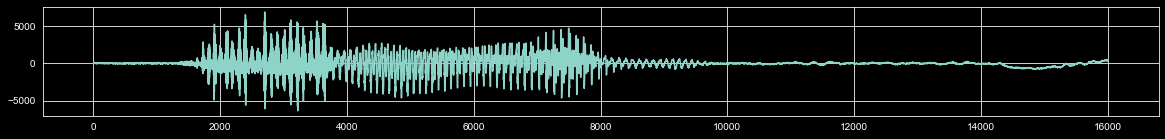

In [36]:
seaborn.lineplot(data=samples)

<StemContainer object of 3 artists>

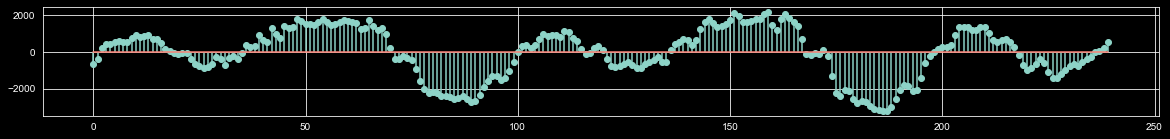

In [37]:
plt.stem(samples[4000:(4000 + 15*16)])

We now understand that digital audio is...
- from the data representation perspective: a one-dimensional numeric array
- in data analysis parlance: a _univariate time series_ with periodic patterns

### Introducing `librosa`

[**librosa**](https://librosa.org) is a Python library for audio and music processing. Among its functions are music-related tools, but also generic audio processing methods, some of which are going to help you with feture engineering.

**Task**: _Use `librosa` to load an audio clip from the dataset. Make sure the original sample rate is used. Then, use the display functionality from librosa to plot a waveform with duration in seconds on the x-axis._

In [39]:
import librosa

In [51]:
audio, sample_rate  = librosa.load(example_audio_path, sr=None)

In [49]:
from librosa.display import waveplot

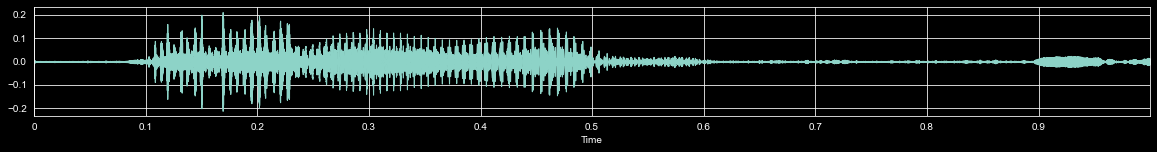

In [50]:
waveplot(audio, sr=sample_rate)

### Exploring the Dataset for Data Cleaning

**Task**: _Append additional columns to the training dataframe: The sample rate, the number of samples, and the the duration in seconds of each audio clip._

In [91]:
def get_audio_info(row):
    file_path = row["file_path"]
    audio, sample_rate  = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
    n_samples = audio.shape[0]
    duration = librosa.get_duration(audio, sr=sample_rate)
    return (sample_rate, n_samples, duration)

In [92]:
train_data[["sample_rate", "samples", "duration [s]"]] = train_data.apply(get_audio_info, axis=1, result_type="expand")

In [93]:
train_data

,file_path,label,file_name,sample_rate,duration [s],samples
0,bed/0c40e715_nohash_0.wav,bed,0c40e715_nohash_0.wav,16000.0,1.0000,16000.0
1,bed/0ea0e2f4_nohash_0.wav,bed,0ea0e2f4_nohash_0.wav,16000.0,1.0000,16000.0
2,bed/0ea0e2f4_nohash_1.wav,bed,0ea0e2f4_nohash_1.wav,16000.0,1.0000,16000.0
3,bed/105a0eea_nohash_0.wav,bed,105a0eea_nohash_0.wav,16000.0,1.0000,16000.0
4,bed/1528225c_nohash_0.wav,bed,1528225c_nohash_0.wav,16000.0,1.0000,16000.0
...,...,...,...,...,...,...
13628,zero/fa7895de_nohash_0.wav,zero,fa7895de_nohash_0.wav,16000.0,1.0000,16000.0
13629,zero/fa7895de_nohash_1.wav,zero,fa7895de_nohash_1.wav,16000.0,1.0000,16000.0
13630,zero/fd32732a_nohash_0.wav,zero,fd32732a_nohash_0.wav,16000.0,1.0000,16000.0
13631,zero/fde2dee7_nohash_0.wav,zero,fde2dee7_nohash_0.wav,16000.0,1.0000,16000.0


**Task**: _Verify that the clips have a consistent sample rate._

In [72]:
train_data["sample_rate"].value_counts()

16000.0    13633
Name: sample_rate, dtype: int64

**Task**: _Inspect the distribution of the length and duration of the audio clips._

In [73]:
import seaborn

(array([  4.,   3.,  54.,  28.,  25., 104., 131., 218., 187., 511.]),
 array([ 6144. ,  7099.8,  8055.6,  9011.4,  9967.2, 10923. , 11878.8,
        12834.6, 13790.4, 14746.2, 15702. ]),
 <BarContainer object of 10 artists>)

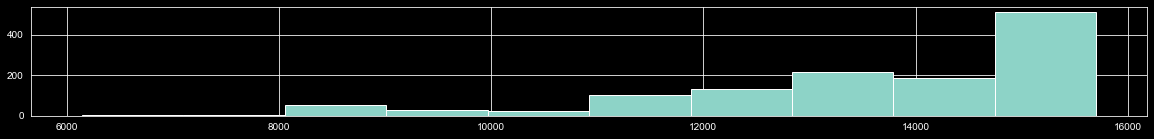

In [103]:
plt.hist(train_data[train_data["samples"] < 16000]["samples"])

In [87]:
train_data[train_data["duration [s]"] < 1.0]

,file_path,label,file_name,sample_rate,duration [s]
14,bed/283d7a53_nohash_0.wav,bed,283d7a53_nohash_0.wav,16000.0,0.981375
25,bed/3ff840aa_nohash_0.wav,bed,3ff840aa_nohash_0.wav,16000.0,0.960000
26,bed/3ff840aa_nohash_1.wav,bed,3ff840aa_nohash_1.wav,16000.0,0.789375
27,bed/422d3197_nohash_0.wav,bed,422d3197_nohash_0.wav,16000.0,0.682688
46,bed/5828dfa2_nohash_1.wav,bed,5828dfa2_nohash_1.wav,16000.0,0.835938
...,...,...,...,...,...
13575,zero/d107dc42_nohash_0.wav,zero,d107dc42_nohash_0.wav,16000.0,0.938688
13587,zero/da7689f1_nohash_0.wav,zero,da7689f1_nohash_0.wav,16000.0,0.789500
13590,zero/dbaf8fc6_nohash_0.wav,zero,dbaf8fc6_nohash_0.wav,16000.0,0.768000
13623,zero/f5e5e8b0_nohash_1.wav,zero,f5e5e8b0_nohash_1.wav,16000.0,0.975250


**Task**: _How can you make sure that the audio clips have a uniform length? Implement a function for this purpose._

In [107]:
import numpy

In [120]:
def pad_audio_with_silence(audio: numpy.ndarray, sample_rate: int, duration: float):
    target_n_samples = int(duration * sample_rate)
    assert audio.shape[0] < target_n_samples
    padded_audio = numpy.zeros(target_n_samples)
    padded_audio[:audio.shape[0]] = audio
    return padded_audio

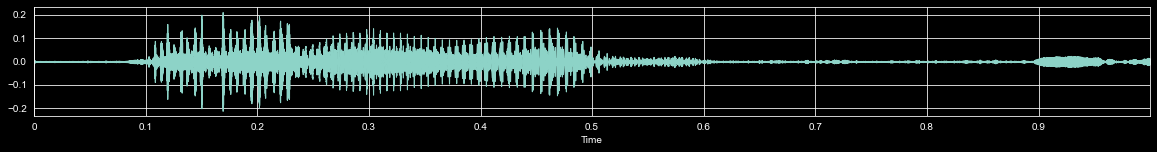

In [121]:
waveplot(audio, sr=16000)

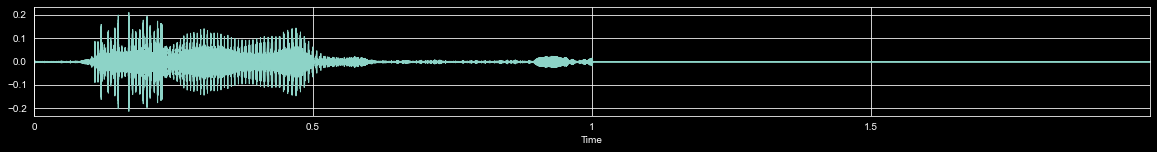

In [124]:
waveplot(pad_audio_with_silence(audio, sample_rate=16000, duration=2), sr=16000)